In [1]:
import pandas as pd

In [2]:
df = pd.read_parquet("Anlage.parquet")

In [3]:
df.sample(10)

,lfd. Nr.,PLZ,Ort,Straße,Nr,Geschäftsbereich (Art der Liegenschaft),Bezeichnung Branche/Nutzer,Objektfläche m²
104855,104856,86929,Penzing,Kauferinger Str.,48,Gewerbe/sonst. Nutzung,Unbekannt,0.00
86411,86412,16827,Zermützel,Am Zermützelsee,None,Gewerbe/sonst. Nutzung,Unbekannt,45.41
13786,13787,18435,Stralsund,A.-Zweig-Str.,None,Gewerbe/sonst. Nutzung,Unbekannt,20.00
146074,146075,22049,Hamburg,Lesserstraße,180,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,2835.00
75437,75438,1796,Pirna,Rottwerndorfer Straße,45p,Dienstliegenschaften,Bundesanstalt THW,68.00
174486,174487,41844,Wegberg,Canberra Crescent,14,Gewerbe/sonst. Nutzung,Unbekannt,122.00
159163,159164,27639,Wurster Nordseeküste,Peter-Strasser-Platz,1,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,332.30
110266,110267,<NA>,None,None,None,Dienstliegenschaften Bundeswehr,Unbekannt,0.00
165125,165126,86836,Graben,Landsberger Str.,7,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,325.00
80346,80347,18069,Rostock,Schulenburgstraße 12,None,Wohnen,Unbekannt,65.70


# Which "User" owns the most unique! stuff

In [4]:
df.groupby("Bezeichnung Branche/Nutzer").nunique().sort_values(by="lfd. Nr.",ascending=False)

,lfd. Nr.,PLZ,Ort,Straße,Nr,Geschäftsbereich (Art der Liegenschaft),Objektfläche m²
Bezeichnung Branche/Nutzer,,,,,,,
Unbekannt,132836,3123,4073,17981,2528,6,15875
BMVg.-Unterbringung,33545,634,563,999,259,3,18856
Bundesanstalt THW,3099,740,715,836,217,3,2075
Generalzolldirektion,2917,489,450,824,237,3,1726
Bundespolizei,2054,248,222,327,128,1,1592
...,...,...,...,...,...,...,...
Energie u. Nachhalti,1,1,1,1,1,1,1
Bilat. Zusammenarb.,1,1,1,1,1,1,1
Sonst. Bewilligungen,1,1,1,1,1,1,1


# The biggest real estate categories

In [5]:
df.groupby("Geschäftsbereich (Art der Liegenschaft)").nunique().sort_values(by="lfd. Nr.",ascending=False)

,lfd. Nr.,PLZ,Ort,Straße,Nr,Bezeichnung Branche/Nutzer,Objektfläche m²
Geschäftsbereich (Art der Liegenschaft),,,,,,,
Dienstliegenschaften Bundeswehr,65020,611,545,949,249,7,18991
Wohnen,53977,770,730,8138,1764,4,3669
Gewerbe/sonst. Nutzung,33889,1583,1839,7039,756,9,7605
Dienstliegenschaften,19369,1734,1493,3299,690,105,9654
Bundesforst,7329,1390,1837,1090,37,2,5281
Verwaltungsaufgaben,604,241,240,232,33,2,376


# Managed property per category; sorted by size

In [8]:
df.groupby("Geschäftsbereich (Art der Liegenschaft)").sum().drop(columns=["lfd. Nr.","PLZ"]).sort_values(by="Objektfläche m²", ascending=False)

,Objektfläche m²
Geschäftsbereich (Art der Liegenschaft),
Dienstliegenschaften Bundeswehr,2.129619e+09
Bundesforst,1.308551e+09
Gewerbe/sonst. Nutzung,9.992754e+07
Dienstliegenschaften,6.652432e+07
Verwaltungsaufgaben,1.499250e+07
Wohnen,3.423557e+06


# Managed property by user; sorted by size

In [9]:
df.groupby("Bezeichnung Branche/Nutzer").sum().drop(columns=["lfd. Nr.","PLZ"]).sort_values(by="Objektfläche m²", ascending=False)

,Objektfläche m²
Bezeichnung Branche/Nutzer,
BMVg.-Unterbringung,2.087621e+09
Unbekannt,1.481274e+09
Bundespolizei,1.383658e+07
BAM,1.215331e+07
Friedrich-Löffler-In,5.337040e+06
...,...
"Heimat, Ges, Verfass",2.283050e+03
sonst. Bewil.(BMELV),2.210240e+03
Bilat. Zusammenarb.,1.480550e+03


# 10 Biggest properties

In [10]:
df.sort_values(by="Objektfläche m²",ascending=False).head(10)

,lfd. Nr.,PLZ,Ort,Straße,Nr,Geschäftsbereich (Art der Liegenschaft),Bezeichnung Branche/Nutzer,Objektfläche m²
136528,136529,29683,Osterheide,N.N.,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,143505160.0
163076,163077,39638,Gardelegen,Salchauer Chaussee,1,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,121003889.0
163636,163637,2957,Weißkeißel,Muskauer Forst,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,113392861.0
163075,163076,39638,Gardelegen,Salchauer Chaussee,1,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,112234400.0
136527,136528,29683,Osterheide,N.N.,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,108444570.0
154293,154294,17358,Torgelow,Pasewalker Chaussee,7,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,93386240.0
162964,162965,39291,Möckern,Bergstr.,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,91173377.0
99303,99304,16831,Rheinsberg OT Flecken Zechlin,SCHONORT,None,Bundesforst,Unbekannt,82487930.0
136522,136523,29633,Munster,Zw. B 209 u. Pl.-Randstr. Brockhs,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,75715466.0
162283,162284,6925,Annaburg,Annaburger Heide,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,70751500.0


# 10 Smallest properties (with a size bigger than 0)

In [11]:
df[df["Objektfläche m²"]>0].sort_values(by="Objektfläche m²",ascending=True).head(10)
### Weird results

,lfd. Nr.,PLZ,Ort,Straße,Nr,Geschäftsbereich (Art der Liegenschaft),Bezeichnung Branche/Nutzer,Objektfläche m²
22842,22843,26441,Jever,Auf der Dreesche u.a.,None,Wohnen,Unbekannt,0.001
81460,81461,14167,Berlin,Jänickestraße 1,None,Wohnen,Unbekannt,0.001
23162,23163,26441,Jever,Auf der Dreesche u.a.,None,Wohnen,Unbekannt,0.001
48362,48363,6120,Halle (Saale),Vogelsang/Am Heiderand,None,Wohnen,Unbekannt,0.010
48363,48364,6120,Halle (Saale),Vogelsang/Am Heiderand,None,Wohnen,Unbekannt,0.010
48364,48365,6120,Halle (Saale),Vogelsang/Am Heiderand,None,Wohnen,Unbekannt,0.010
48365,48366,6120,Halle (Saale),Vogelsang/Am Heiderand,None,Wohnen,Unbekannt,0.010
48366,48367,6120,Halle (Saale),Vogelsang/Am Heiderand,None,Wohnen,Unbekannt,0.010
23279,23280,81677,München,Richard-Strauss-Str. 28,None,Wohnen,Unbekannt,0.010
23280,23281,81677,München,Steinhauserstr./Richard-Strauss-Str.,None,Wohnen,Unbekannt,0.010


# Distribution of the property size

In [12]:
df["Objektfläche m²"].describe()

count    1.801880e+05
mean     2.010699e+04
std      8.962014e+05
min      0.000000e+00
25%      1.040000e+01
50%      6.530000e+01
75%      2.500000e+02
max      1.435052e+08
Name: Objektfläche m², dtype: float64

<AxesSubplot:>

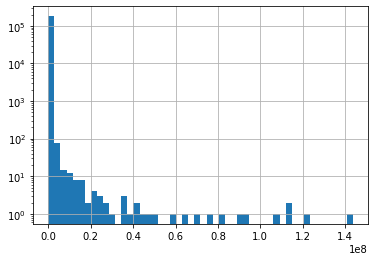

In [13]:
df["Objektfläche m²"].hist(bins=50,log=True)

## Soo many small ones... let's zoom in

<AxesSubplot:>

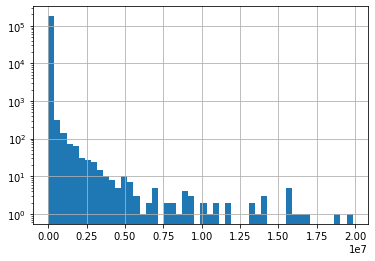

In [14]:
df[df["Objektfläche m²"]<0.2e8]["Objektfläche m²"].hist(bins=50,log=True)

### Lots of small properties

<AxesSubplot:>

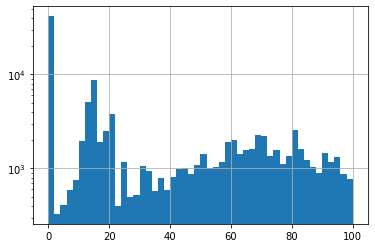

In [15]:
df[df["Objektfläche m²"]<100]["Objektfläche m²"].hist(bins=50,log=True)

In [15]:
# I need coffee

### Stuff on Sylt

In [18]:
df[df["Ort"].fillna("").str.contains("Sylt")]

,lfd. Nr.,PLZ,Ort,Straße,Nr,Geschäftsbereich (Art der Liegenschaft),Bezeichnung Branche/Nutzer,Objektfläche m²
282,283,25980,Rantum (Sylt),None,None,Gewerbe/sonst. Nutzung,Unbekannt,37.70
296,297,25980,Sylt-Ost,Sjipwai,26,Gewerbe/sonst. Nutzung,Unbekannt,165.13
309,310,25980,Rantum (Sylt),Am Torbogen,5,Gewerbe/sonst. Nutzung,Unbekannt,2789.10
718,719,25997,Hörnum (Sylt),An der Düne 50,None,Gewerbe/sonst. Nutzung,Unbekannt,171.09
833,834,25980,Rantum (Sylt),None,None,Gewerbe/sonst. Nutzung,Unbekannt,735.00
...,...,...,...,...,...,...,...,...
97826,97827,25980,Rantum (Sylt),None,None,Gewerbe/sonst. Nutzung,Unbekannt,0.00
98053,98054,25980,Sylt-Ost,None,None,Gewerbe/sonst. Nutzung,Unbekannt,920.00
118300,118301,25997,Hörnum (Sylt),Rantumer Str.,None,Dienstliegenschaften Bundeswehr,Unbekannt,0.00
146302,146303,25997,Hörnum (Sylt),Rantumer Str.,None,Dienstliegenschaften Bundeswehr,BMVg.-Unterbringung,940.00
